
# Clasificación de mensajes de odio

## Objetivos

El objetivo es generar un proyecto completo de machine learning para clasificar mensajes de odio. Debe detallar los pasos que hay que realizar para la clasificación de mensajes, así como una evaluación de los resultados.

- Decidir la técnica de aprendizaje automático a utilizar
- Analizar diferentes modelos de aprendizaje supervisado para la clasificación de mensajes de odio.
- Evaluar los resultados obtenidos por cada modelo en términos de precisión, recall, y f1.

## Descripción de la actividad

La empresa SureTech Innovations quiere implementar un clasificador de mensajes de odio. Para ello se deben entrenar diferentes modelos de clasificación, evaluar el rendimiento de cada uno de ellos, y finalmente, decidir cuál sería el mejor.

Para llevar a cabo esta actividad cuentas con el dataset simplificado de HateSpeech en la siguiente URL: https://github.com/almudenaris/TAA/blob/main/out.csv

Los pasos que se deben seguir para desarrollar esta actividad son:

1.	¿Qué tarea de aprendizaje automático se pretende resolver? ¿Qué análisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos? Realiza un análisis exploratorio de datos adecuado a la tarea que se pretende resolver y al dataset facilitado. Explica con detalle, en base a la tarea que se quiere resolver, qué análisis serían necesarios realizar sobre los datos.

2.	En base a la tarea que se pide realizar y a las características del dataset decide qué algoritmo o algoritmos se deben utilizar. Implementa tres modelos. Realiza los entrenamientos necesarios para cada uno de ellos. Explica por qué son convenientes los algoritmos elegidos.

3.	Realiza una explicación de las métricas de evaluación que se deben utilizar para valorar la bondad del modelo. Justifica la decisión de las elegidas. ¿Cómo habría que evaluar el modelo? Evalúa los modelos entrenados en el punto anterior y explica los resultados obtenidos.


## Dataset

El dataset original proporcionado en el proyecto transversal ha sido adaptado para la realización de esta actividad. Esa adaptación ha incluido:

- Eliminación de nulos y duplicados
- Eliminación de URLs, emojis y menciones a los periódicos
- Eliminación de filas vacías
- Limpieza y homogeneización de datos.
    - Convertir la totalidad del texto a minúscula
    - Eliminar signos de puntuación
    - Eliminar números
    - Eliminar espacios en blanco adicionales
    - Eliminar palabras con longitud menor a 2 caracteres
    - Eliminar stopwords
    - Tokenización
    - Lematización
- Proceso de extracción de características
    - Conteo de palabras positivas (A)
    - Conteo de palabras negativas (B)
    - Conteo del número de bigrams más comunes (C)
    - Conteo del número de menciones a otros usuarios (D)
    - Categoría del sentimiento según librería ‘pysentimiento’ en español (E)

- Estandarización de las características (A_t,..E_t)
- Combinación de características f1*fi (iA..iE) (Valor1,..Valor10).

# Respuesta a la primera pregunta

## 1. ¿Qué tareas de aprendizaje automático se pretende resolver?
SureTech Innovations busca abordar el problema del aumento de mensajes de odio en redes sociales, con un enfoque en identificar a los autores de dichos mensajes en castellano. El proyecto se enfoca en desarrollar un clasificador de mensajes de odio utilizando técnicas de aprendizaje automático.

La tarea a resolver es clasificación de mensajes de odio. Se trata de una tarea de aprendizaje supervisado donde el objetivo es asignar una categoría a cada mensaje: odio o no odio.

## 2. ¿Qué analisis previos serían necesarios realizar para saber si es posible construir el modelo que buscamos?
En primer lugar los datos ya han sido extraído mediante técnicas de PNL conformados por la eliminación de nulos y duplicados, eliminación de URLs, emojis y menciones a los periódicos ,eliminación de filas vacías y limpieza y homogeneización de datos.

Además de las operaciones descritas previamente, se han realizado las siguientes:

- Comprobación del estado de los datos.
- Distribución de las variables numéricas.
- Abstracción de características de algunas columnas ya existentes (número de palabras por comentario).
- Cálculo de la matriz de correlación entre las variables independientes con el fin de comprobar si existen columnas redudantes y se eliminan las varaibles con correlación 1 dado que no es necesario mantener las dos.
- One Hot Encoding para la variable 'E', creando 6 columnas para indicar el nivel de odio en cada comentario en una columna adicional.
- Análisis del tipo de atributos del dataset y conversión al tipo apropiado.
- Análisis de la distribución de los datos y posibles datos atípicos.
- Correlación de Spearman para ver qué variable tiene más relación con la variable objetivo.

Respondiendo a la pregunta ¿Que és necesario para saber si es posible realizar un modelo que concuerde con el aprendizaje automático que se pretende resolver? se deben cumplir con los siguientes objetivos:

Para determinar si es posible construir un modelo de aprendizaje automático que cumpla con los objetivos deseados, es necesario cumplir con los siguientes criterios:

- Dataset limpio: Los datos deben estar libres de valores faltantes o nulos.
- Variable objetivo balanceada: La variable objetivo no debe estar desbalanceada de manera que pueda introducir sesgos en la predicción, o este desbalanceo debe estar contemplado y ser tratable.
- Variables predictoras relevantes: Las variables predictoras deben tener una relación significativa con la variable objetivo.
- Suficiente muestra: La muestra de datos debe ser suficientemente grande y representativa para entrenar el modelo adecuadamente.




A continuación se realizará un EDA siguiendo las pautas y pasos indicados previamente y que por lo tanto es adecuado para la tarea que se pretende resolver.

## EDA

In [1]:
# coloca tu código y respuestas del punto 1 en esta sección
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import matplotlib as mpl

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
path = 'out.csv'

df = pd.read_csv(f'{path}',sep=",")

In [4]:
# Mostrar las primeras filas del DataFrame
df.head()

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,D_t,E_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,-0.416577,0.440638,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,-0.416577,-0.531099,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,-0.416577,-0.531099,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,-0.416577,-0.531099,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,-0.416577,-0.531099,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244


In [5]:
# Mostramos los tipos de variable en el DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   A           10000 non-null  int64  
 1   B           10000 non-null  int64  
 2   C           10000 non-null  int64  
 3   D           10000 non-null  int64  
 4   E           10000 non-null  int64  
 5   comentario  10000 non-null  object 
 6   label       10000 non-null  float64
 7   A_t         10000 non-null  float64
 8   B_t         10000 non-null  float64
 9   C_t         10000 non-null  float64
 10  D_t         10000 non-null  float64
 11  E_t         10000 non-null  float64
 12  Valor_1     10000 non-null  float64
 13  Valor_2     10000 non-null  float64
 14  Valor_3     10000 non-null  float64
 15  Valor_4     10000 non-null  float64
 16  Valor_5     10000 non-null  float64
 17  Valor_6     10000 non-null  float64
 18  Valor_7     10000 non-null  float64
 19  Valor_8     10000 non-null

In [6]:
# Mostramos las dimensiones del DF
display(df.shape)
# Y la cantidad de nulos de cada variable
display(df.isnull().sum())

(10000, 22)

A             0
B             0
C             0
D             0
E             0
comentario    0
label         0
A_t           0
B_t           0
C_t           0
D_t           0
E_t           0
Valor_1       0
Valor_2       0
Valor_3       0
Valor_4       0
Valor_5       0
Valor_6       0
Valor_7       0
Valor_8       0
Valor_9       0
Valor_10      0
dtype: int64

## Información del dataset
Número de registros: <b>10000</b> registros con valores informados
<hr>

Se aprecia que no existe ningun valor nulo en el dataset y que los pasos de preprocesamiento que se mencionaban al inicio de la tarea se han ejecutado de forma satisfactoria, dejando un dataset limpio y con el que se puede trabajar directamente

In [7]:
for columna in df.columns:
    if columna != 'comentario':
        # Obtener los diferentes valores únicos de la columna
        valores_unicos = df[columna].unique()
        # Imprimir los valores únicos de la columna
        print(f"Valores únicos en la columna '{columna}': {valores_unicos}")

Valores únicos en la columna 'A': [ 2  4  3  0  7  1  5  6  8  9 12 10 11 13 20 18 24]
Valores únicos en la columna 'B': [ 64  70  88  38  59   3  50  40  17  43  52  42  57  53  56  34   6  48
  33  66  16  41  74  27  14  54  28  21  18   7   2 133   5  60   0   1
  10  23 122  12  13  75 106  32  44 120  22  25  30  35  19  61  79  37
  39  68  58  26  47   9  31  29  15  45   4  67   8  84  11  62  49  69
  46  63  24  73 117 163  95  82 104  36  20  51  65 139  89  71  77  93
  55  72  76  83 119 108 116  97  87 113  90  85 101  94  96 105  81 107
 127 161  86 110 112 114  92  78 182  91 215 155 109 100 102  99 183 270
 121 257 173 159 136 135 324  80 142 276 103 154 164 118 192 171 130 165
 209 148 198 150 128 158 132 224 149 140 131 138 151  98 176 115 197 286
 137 262 124 145 328 111 219 185 174 134 147 157 141 123 144 195 126 166
 156 160 169 143 125 146 162 213 318]
Valores únicos en la columna 'C': [30 21 50 17  1  6  5 12  4  3  8  9  0 10  7 11  2 22 18 15 13 24 14 20
 16 

In [8]:
df.describe()

,A,B,C,D,E,label,A_t,B_t,C_t,D_t,E_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.957400,26.098100,5.674600,0.091300,2.200600,0.500000,0.735989,0.895389,1.014276,-0.241571,0.538103,2.448370,2.515129,-0.222304,-0.324603,3.343632,-0.302639,-0.756762,-0.286422,-0.357238,-0.050935
std,1.741864,34.012341,7.317149,0.352671,2.729488,0.500025,1.863010,1.672944,1.844389,0.676008,1.326172,8.690527,9.827254,1.160914,1.547278,10.567912,1.045447,0.885760,1.218960,1.297408,1.129825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.287998,-0.388282,-0.416086,-0.416577,-0.531099,-2.197166,-3.582457,-10.573231,-11.207779,-1.393841,-6.558948,-8.362074,-9.067027,-11.559651,-5.886890
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-0.287998,-0.339096,-0.164022,-0.416577,-0.531099,-0.086494,-0.097950,-0.432068,-0.686619,-0.025057,-0.760297,-0.943189,-0.561697,-0.716113,-0.993166
50%,0.000000,5.000000,3.000000,0.000000,0.000000,0.500000,-0.287998,-0.142350,0.340105,-0.416577,-0.531099,0.097659,0.047238,0.119973,-0.415081,0.063687,-0.043150,-0.808442,-0.141680,-0.314500,0.221244
75%,1.000000,46.000000,7.000000,0.000000,6.000000,1.000000,0.781552,1.874292,1.348361,-0.416577,2.384111,1.157323,0.659812,0.119973,0.152955,2.527222,0.141260,-0.314174,0.068328,0.087112,0.221244
max,24.000000,328.000000,88.000000,6.000000,6.000000,1.000000,25.381200,15.744855,21.765536,11.084360,2.384111,332.263677,246.545947,21.283302,60.511589,331.989523,20.009412,19.361276,28.053013,23.045933,17.286505


Con estos pasos previos también confirmamos que no hay presencia de datos que sean erróneos y de la misma forma nos ayudan a hacernos una idea de la distribución de los datos, donde no se aprecia ningún valor atípico.

A continuación se extrae de la columna 'comentario' información que pueda aportar más datos con los que trabajar como el conteo de palabras, que añadimos a una nueva columna.

In [9]:
# Crear columnas nuevas
df['palabras'] = df['comentario'].apply(lambda x: len(x.split(',')))

In [10]:
df.head()

,A,B,C,D,E,comentario,label,A_t,B_t,C_t,D_t,E_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,palabras
0,2,64,30,0,2,"pandemia,originado,covid,cierto,incidencia,aba...",0.0,1.851102,2.759647,7.145831,-0.416577,0.440638,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560,444
1,4,70,21,0,0,"ser,mes,larga,espera,llegar,momento,siempre,pr...",0.0,3.990202,3.054765,4.877255,-0.416577,-0.531099,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244,481
2,4,88,50,0,0,"cartagena,san,sebastiar,fuengirola,irun,orense...",0.0,3.990202,3.940120,12.187108,-0.416577,-0.531099,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244,714
3,3,38,21,0,0,"pleno,dia,verano,calor,plan,mas,apetecibl,disf...",0.0,2.920652,1.480801,4.877255,-0.416577,-0.531099,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244,324
4,0,59,17,0,0,"pasado,junio,celebro,dia,luchar,frente,leishma...",0.0,-0.287998,2.513715,3.869000,-0.416577,-0.531099,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244,438


Procedemos ahora a analizar la correlación entre las distintas variables independientes.

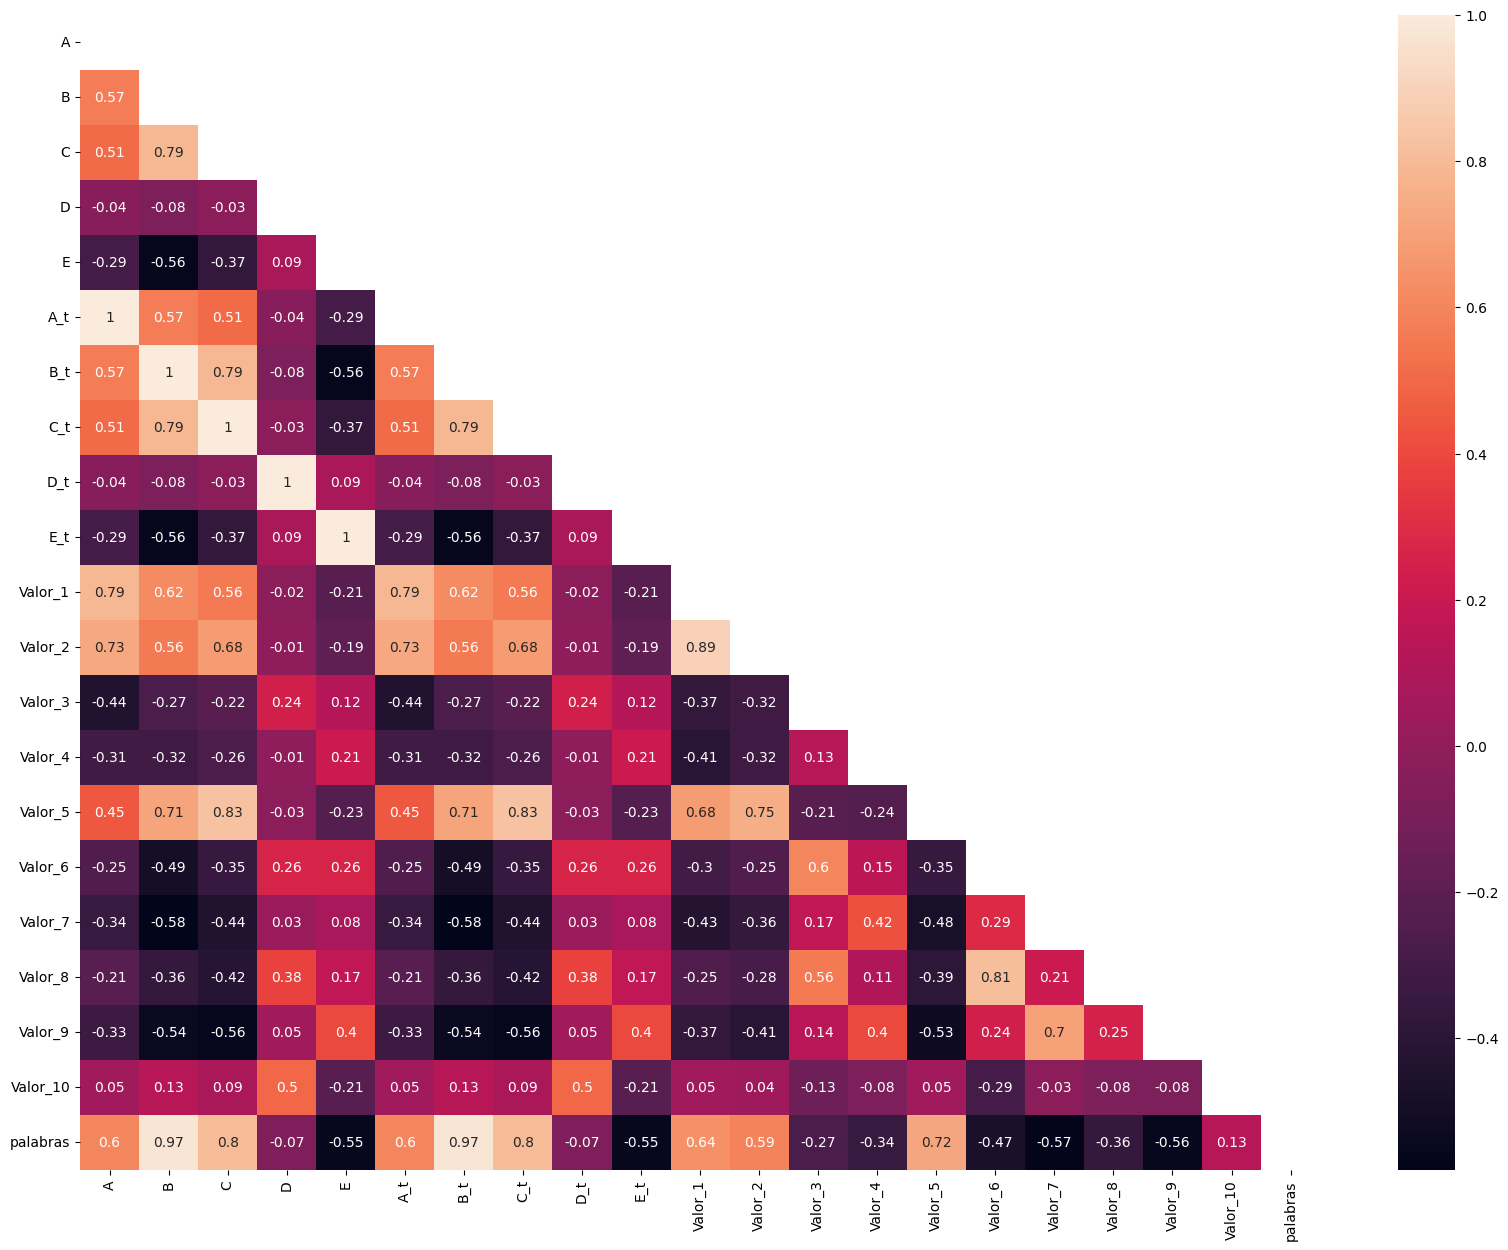


Correlaciones más elevadas:
E    E_t    1.0
A_t  A      1.0
A    A_t    1.0
E_t  E      1.0
B    B_t    1.0
dtype: float64


In [11]:
# Creamos un DF con las variables independientes (X) eliminando la columna 'comentario' que no es numérica y 'label' que es la variable objetivo
X = df.drop(columns=['label', 'comentario'])

num = X
correlations_matrix = round(num.corr(), 2)

# Mostramos la matriz de correlación entre las variables independientes
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(20, 15))
ax = sb.heatmap(correlations_matrix, mask=mask, annot=True, xticklabels=True, yticklabels=True)

plt.show()

# Y las 5 correlaciones más altas
c = correlations_matrix.abs()
np.fill_diagonal(c.values, -2)
s = c.unstack()
so = s.sort_values(ascending=False)
print("\nCorrelaciones más elevadas:")
print(so.head())

Cabe añadir que al ser este un problema de clasificación, no es relevante incluir la correlación con la variable objetivo.

Dada la correlación tan alta entre las columnas del proceso de extracción de caracteristicas (A, B, C, D y E) con su estandarización (A_t, B_t, C_t, D_t y E_t) se procede a eliminar estas primeras columnas a excepcion de la columna E que se procesara con la técncia One hot Encode para separar sus categorias en columnas.

In [12]:
X = df.drop(columns=['comentario','A', 'B', 'C', 'D', 'E','E_t'])

In [13]:
# Aplicar one hot encoding a la columna 'E'
df_encoded = pd.get_dummies(df['E'], prefix='E')
df_final = pd.concat([X, df_encoded], axis=1)
df_final.head()

,label,A_t,B_t,C_t,D_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,palabras,E_0,E_1,E_2,E_3,E_4,E_5,E_6
0,0.0,1.851102,2.759647,7.145831,-0.416577,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560,444,False,False,True,False,False,False,False
1,0.0,3.990202,3.054765,4.877255,-0.416577,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244,481,True,False,False,False,False,False,False
2,0.0,3.990202,3.940120,12.187108,-0.416577,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244,714,True,False,False,False,False,False,False
3,0.0,2.920652,1.480801,4.877255,-0.416577,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244,324,True,False,False,False,False,False,False
4,0.0,-0.287998,2.513715,3.869000,-0.416577,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244,438,True,False,False,False,False,False,False


# Tipos de atributos del dataset

* Variables continuas: A_t, B_t, C_t,	D_t,	Valor_1,	Valor_2,	Valor_3,	Valor_4,	Valor_5,	Valor_6,	Valor_7,	Valor_8,	Valor_9,	Valor_10 y	palabras
* Variables categóricas: label, E_0,	E_1,	E_2,	E_3,	E_4,	E_5 y	E_6

Para que se representen de forma adecuada estas variables categoricas, se adaptan para que se recogan como 1 y 0:

In [14]:
# Convertir 'label' a tipo int
df_final['label'] = df_final['label'].astype(int)

# Convertir las columnas E_0 a E_6 de tipo boolean a int (0 o 1)
df_final[['E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6']] = df_final[['E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6']].astype(int)

display(df_final.info())
display(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   label     10000 non-null  int64  
 1   A_t       10000 non-null  float64
 2   B_t       10000 non-null  float64
 3   C_t       10000 non-null  float64
 4   D_t       10000 non-null  float64
 5   Valor_1   10000 non-null  float64
 6   Valor_2   10000 non-null  float64
 7   Valor_3   10000 non-null  float64
 8   Valor_4   10000 non-null  float64
 9   Valor_5   10000 non-null  float64
 10  Valor_6   10000 non-null  float64
 11  Valor_7   10000 non-null  float64
 12  Valor_8   10000 non-null  float64
 13  Valor_9   10000 non-null  float64
 14  Valor_10  10000 non-null  float64
 15  palabras  10000 non-null  int64  
 16  E_0       10000 non-null  int64  
 17  E_1       10000 non-null  int64  
 18  E_2       10000 non-null  int64  
 19  E_3       10000 non-null  int64  
 20  E_4       10000 non-null  int

None

,label,A_t,B_t,C_t,D_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,palabras,E_0,E_1,E_2,E_3,E_4,E_5,E_6
0,0,1.851102,2.759647,7.145831,-0.416577,5.108388,13.227660,-0.771127,0.815665,19.719970,-1.149606,1.216004,-2.976790,3.148722,-0.183560,444,0,0,1,0,0,0,0
1,0,3.990202,3.054765,4.877255,-0.416577,12.189130,19.461233,-1.662227,-2.119191,14.898871,-1.272546,-1.622382,-2.031754,-2.590305,0.221244,481,1,0,0,0,0,0,0
2,0,3.990202,3.940120,12.187108,-0.416577,15.721875,48.629021,-1.662227,-2.119191,48.018675,-1.641365,-2.092593,-5.076872,-6.472559,0.221244,714,1,0,0,0,0,0,0
3,0,2.920652,1.480801,4.877255,-0.416577,4.324903,14.244765,-1.216677,-1.551155,7.222244,-0.616868,-0.786452,-2.031754,-2.590305,0.221244,324,1,0,0,0,0,0,0
4,0,-0.287998,2.513715,3.869000,-0.416577,-0.723945,-1.114264,0.119973,0.152955,9.725563,-1.047156,-1.335031,-1.611737,-2.054821,0.221244,438,1,0,0,0,0,0,0


<hr>

<h2> Distribución de los datos </h2>

A continuación se analizan las distribuciones de todas las variables numéricas y categóricas de los datos en histogramas así como la grafica de bigotes de gato para la detección de posibles outliers.

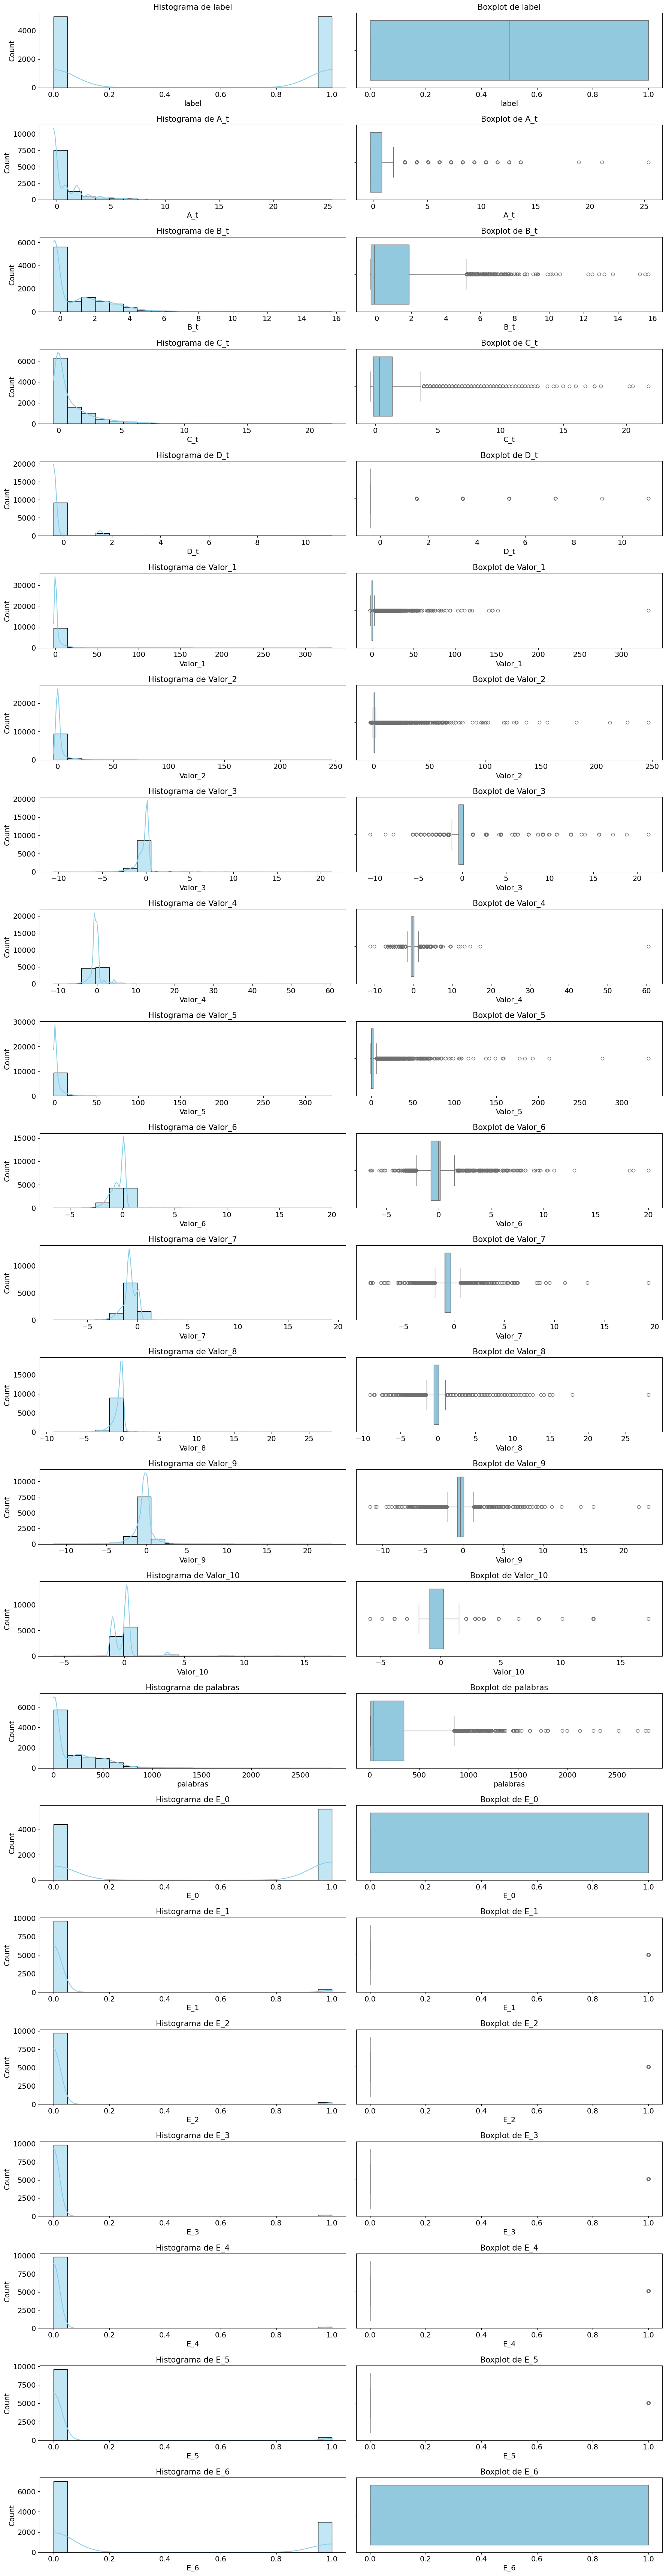

In [15]:
# Preparamos una figura de m x n
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15)

# Creamos una figura de m x n
figure, axes = plt.subplots(nrows=len(df_final.columns), ncols=2)

# Ajustamos el tamaño de la figura en función del número de columnas
figure_height = len(df_final.columns) * 3  # Incrementamos el tamaño vertical
figure.set_size_inches(18, figure_height)  # Ajusta la altura proporcionalmente

for row, column in enumerate(df_final.columns):
    sb.histplot(df_final[column], ax=axes[row, 0], kde=True, bins=20, color='skyblue')
    axes[row, 0].set(title=f'Histograma de {column}')
    axes[row, 0].set_xlabel(column)

    sb.boxplot(x=df_final[column], ax=axes[row, 1], color='skyblue')
    axes[row, 1].set(title=f'Boxplot de {column}')
    axes[row, 1].set_xlabel(column)

# Ajustamos automáticamente la disposición de las subtramas
plt.tight_layout()

plt.show()

Entre las columnas nuevas del one hot encoding de la columna **E**, se observa que hay dos categorías que tienen una distribución binomial con valores en ambos lados. Al agrupar estos valores con la columna **label** que determina si la frase contiene odio (**label** = 1) o no (**label** = 0), se observa que **E_6** es más representativa de la categoría de Odio, por lo que se puede interpretar como la categoría de **sentimiento negativo**. Por otro lado, **E_0** tiene una mayor representación de valores sin Odio, por lo que se presenta como la etiqueta de **sentimiento positivo**.

In [16]:
# Agrupar por 'E_' y 'label' y contar los registros
conteo_registros = df_final.groupby(['E_0', 'E_1', 'E_2', 'E_3', 'E_4', 'E_5', 'E_6', 'label']).size().reset_index(name='count')

# Mostrar el resultado
print(conteo_registros)

    E_0  E_1  E_2  E_3  E_4  E_5  E_6  label  count
0     0    0    0    0    0    0    1      0     17
1     0    0    0    0    0    0    1      1   2967
2     0    0    0    0    0    1    0      0     19
3     0    0    0    0    0    1    0      1    354
4     0    0    0    0    1    0    0      0     23
5     0    0    0    0    1    0    0      1    171
6     0    0    0    1    0    0    0      0     34
7     0    0    0    1    0    0    0      1    144
8     0    0    1    0    0    0    0      0     73
9     0    0    1    0    0    0    0      1    196
10    0    1    0    0    0    0    0      0    163
11    0    1    0    0    0    0    0      1    226
12    1    0    0    0    0    0    0      0   4671
13    1    0    0    0    0    0    0      1    942


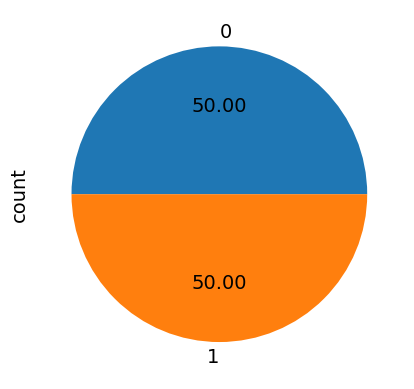

In [17]:
df_final['label'].value_counts().plot(kind='pie',autopct='%.2f',)
plt.show()

In [18]:
from scipy.stats import spearmanr

# Calcula la correlación de Spearman entre 'label' y otras variables
correlations = {}
for column in df_final.columns:
    if column != 'label':
        spearman_corr, p_value = spearmanr(df_final['label'], df_final[column])
        correlations[column] = spearman_corr

# Ordena las correlaciones en orden descendente
sorted_correlations = sorted(correlations.items(), key=lambda item: item[1], reverse=True)

# Muestra las correlaciones ordenadas
for column, correlation in sorted_correlations:
    print(f"Correlation with 'label' for {column}: {correlation}")

Correlation with 'label' for Valor_6: 0.7058991734604916
Correlation with 'label' for E_6: 0.6447299072381517
Correlation with 'label' for Valor_8: 0.5581427724021264
Correlation with 'label' for Valor_9: 0.5404073552411922
Correlation with 'label' for Valor_7: 0.3228029651425019
Correlation with 'label' for Valor_3: 0.3117069042838831
Correlation with 'label' for E_5: 0.17678479335984376
Correlation with 'label' for D_t: 0.13903678774865735
Correlation with 'label' for E_4: 0.10730375153886386
Correlation with 'label' for E_3: 0.08319222103902374
Correlation with 'label' for E_2: 0.07602391578321586
Correlation with 'label' for Valor_4: 0.07029089286050008
Correlation with 'label' for E_1: 0.0325822791477684
Correlation with 'label' for Valor_1: -0.2176659100895181
Correlation with 'label' for Valor_2: -0.255178163706013
Correlation with 'label' for A_t: -0.4374872640867238
Correlation with 'label' for Valor_10: -0.5896296111953213
Correlation with 'label' for C_t: -0.6218376141968939

Por último, podemos ver un poco los outliers detectados con el gráfico y caja y bigotes.

In [19]:
iA = df_final['A_t'].idxmax()
iB = df_final['B_t'].idxmax()
iC = df_final['C_t'].idxmax()
iD = df_final['D_t'].idxmax()
iP = df_final['palabras'].idxmax()

# Mostramos la información
df_final.iloc[[iA, iB, iC, iD, iP]]

,label,A_t,B_t,C_t,D_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,palabras,E_0,E_1,E_2,E_3,E_4,E_5,E_6
2905,0,25.381200,4.628730,6.137575,-0.416577,117.482721,155.779020,-10.573231,60.511589,28.409177,-1.928224,11.035404,-2.556774,14.632658,-0.993166,878,0,0,0,0,0,0,1
2645,0,21.103001,15.744855,11.682981,-0.416577,332.263677,246.545947,-8.791030,-11.207779,183.946831,-6.558948,-8.362074,-4.866864,-6.204817,0.221244,2786,1,0,0,0,0,0,0
4665,0,1.851102,15.252991,21.765536,-0.416577,28.234839,40.290225,-0.771127,-0.983118,331.989523,-6.354049,-8.100845,-9.067027,-11.559651,0.221244,1947,1,0,0,0,0,0,0
7362,1,0.781552,-0.339096,0.088042,11.084360,-0.265021,0.068809,8.663003,-0.415081,-0.029855,-3.758659,0.180093,0.975884,-0.046759,-5.886890,19,1,0,0,0,0,0,0
2610,0,5.059752,13.679026,20.253153,-0.416577,69.212475,102.475924,-2.107777,-2.687228,277.043409,-5.698371,-7.264915,-8.437003,-10.756426,0.221244,2817,1,0,0,0,0,0,0


Ninguno de estos registros parece contener información que pudiera ser considerada erronea o que merezca ser retirado del dataset, por lo que todos estos registros se van a mantener. Aunque si es curioso que el comentario con mayor número de palabras negativas no se consdiere mensaje de odio; esto se debe a que tambien tiene un número muy elevado de palabras totales, que empequeñece el total de palabras negativas.

También podemos ver una nube de palarbras de estos registros, centrándonos en que el comentario de mayor mención a otros usuarios es el único clasificado como negativo.

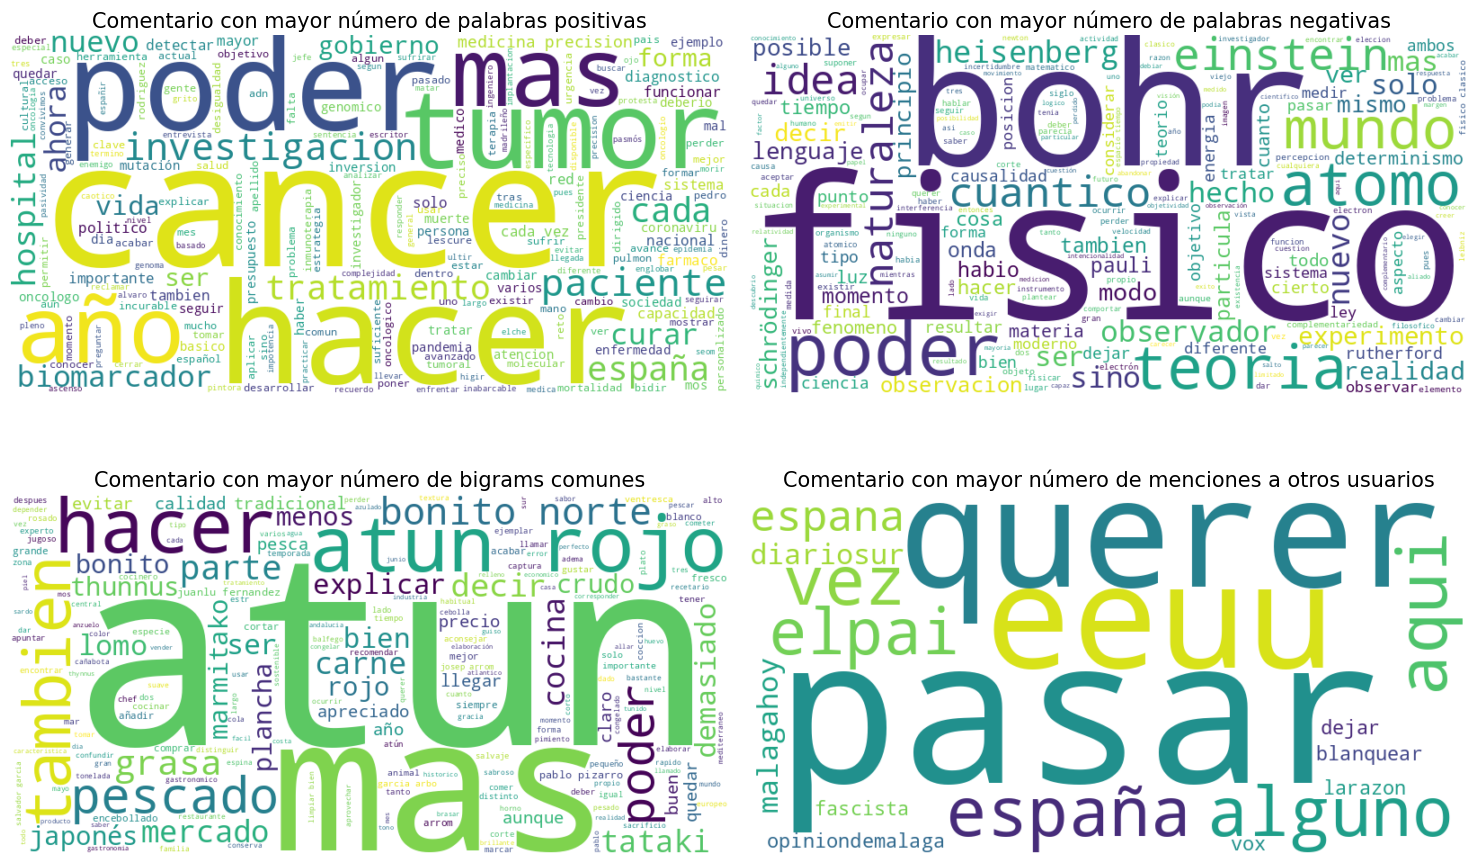

In [20]:
from wordcloud import WordCloud

# Podemos analizar algunos de los comentarios que son potenciales outliers en forma de nubes de palabras
text = df.iloc[iA]['comentario']

# Generar la nube de palabras
wordcloudA = WordCloud(width=800, height=400, background_color='white').generate(text)

text = df.iloc[iB]['comentario']
wordcloudB = WordCloud(width=800, height=400, background_color='white').generate(text)

text = df.iloc[iC]['comentario']
wordcloudC = WordCloud(width=800, height=400, background_color='white').generate(text)

text = df.iloc[iD]['comentario']
wordcloudD = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar las nubes de palabras
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Primera nube de palabras
axs[0, 0].imshow(wordcloudA, interpolation='bilinear')
axs[0, 0].axis('off')
axs[0, 0].set_title('Comentario con mayor número de palabras positivas')

# Segunda nube de palabras
axs[0, 1].imshow(wordcloudB, interpolation='bilinear')
axs[0, 1].axis('off')
axs[0, 1].set_title('Comentario con mayor número de palabras negativas')

# Tercera nube de palabras
axs[1, 0].imshow(wordcloudC, interpolation='bilinear')
axs[1, 0].axis('off')
axs[1, 0].set_title('Comentario con mayor número de bigrams comunes')

# Cuarta nube de palabras
axs[1, 1].imshow(wordcloudD, interpolation='bilinear')
axs[1, 1].axis('off')
axs[1, 1].set_title('Comentario con mayor número de menciones a otros usuarios')

plt.tight_layout()
plt.show()


## SELECCIÓN Y ENTRENAMIENTO DE LOS MODELOS

# Respuesta a la segunda pregunta

### Decide qué algorimo o algoritmos se van a usar y explica por qué
El clasificador Naive Bayes en su forma gaussiana destaca por su eficiencia y simplicidad en el entrenamiento y la predicción, siendo adecuado para conjuntos de datos con características numéricas continuas. Este método puede ajustarse transformando a una distribución gaussiana para los predictores.

Por otro lado, las Máquinas de Vectores de Soporte (SVM) con kernel radial tiene una buena capacidad de manejar relaciones no lineales entre las características y la variable objetivo. Este enfoque es útil cuando tenemos datos que no son linealmente separables.

Finalmente, Random Forest se destaca por su habilidad para capturar relaciones no lineales y manejar eficazmente conjuntos de datos complejos. Este método es útil para identificar la importancia relativa de diferentes características en la predicción de odio o no odio en el dataset.


### Implementación y entrenamiento de los modelos
A continuación se va a proceder a la división de los datos en datos de entrenamiento y validación para implementar y entrenar los tres modelos mencionados previamente.



# RANDOM FOREST

In [119]:
# Separamos los datos en los conjuntos de entrenamiento y test.
from sklearn.model_selection import train_test_split

X, y = df_final.drop('label',axis=1),df_final['label']

#testSplit = 0.2
testSplit = 0.99

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=testSplit, random_state=1)

In [120]:
from sklearn.ensemble import RandomForestClassifier

# Implementamos Random Forest
# Vamos a probar con varias profundidades para ver su rendimiento
n_arboles = {5, 10, 20, 50 , 100}
particion = 'gini'
max_depth = 10
min_samples_split = 10
min_samples_leaf = 2
max_feature = None

randomForest = [RandomForestClassifier(n_estimators = i, criterion= particion,
                                       max_depth = max_depth, min_samples_split = min_samples_split,
                                      min_samples_leaf = min_samples_leaf, max_features =None) for i in n_arboles]

In [121]:
# Entrenamos el modelo
for rf in randomForest:
    rf.fit(X_train, y_train)
    print(f"Modelo con {rf.n_estimators} árboles entrenado.")

Modelo con 50 árboles entrenado.
Modelo con 100 árboles entrenado.
Modelo con 5 árboles entrenado.
Modelo con 20 árboles entrenado.
Modelo con 10 árboles entrenado.


In [122]:
from sklearn.metrics import precision_score

# Precisión promedio de cada modelo
mean_precision = []

# Evaluar los modelos
for i, rf in enumerate(randomForest):
    y_pred = rf.predict(X_test)
    precision = precision_score(y_test, y_pred, average=None)
    mean_precision.append((i, precision.mean()))

# Ordenar los modelos por precisión promedio
mean_precision.sort(key=lambda x: x[1], reverse=True)

# Mostrar los resultados
for i, mean_prec in mean_precision:
    print(f"Modelo con {randomForest[i].n_estimators} árboles: Precisión promedio {mean_prec:.4f}")


Modelo con 50 árboles: Precisión promedio 0.9576
Modelo con 100 árboles: Precisión promedio 0.9571
Modelo con 10 árboles: Precisión promedio 0.9555
Modelo con 20 árboles: Precisión promedio 0.9544
Modelo con 5 árboles: Precisión promedio 0.9538


In [123]:
from sklearn.metrics import confusion_matrix, classification_report
# Mostramos las métricas de evaluación
rf_100_tree = randomForest[2]
y_pred = rf_100_tree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))


[[4450  494]
 [   7 4949]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4944
           1       0.91      1.00      0.95      4956

    accuracy                           0.95      9900
   macro avg       0.95      0.95      0.95      9900
weighted avg       0.95      0.95      0.95      9900



Aprovechamos el Random Forest para obtener las características más relevantes a la hora de hacer la clasificación. Donde observamos que la más importante es palabras con una diferencia considerable con respecto al resto.

In [124]:
# Importancia de las características
feature_importances = pd.Series(rf_100_tree.feature_importances_, index=X.columns).sort_values(ascending=False)
print(feature_importances)

palabras    0.593303
B_t         0.400000
Valor_9     0.003959
Valor_1     0.002738
A_t         0.000000
E_5         0.000000
E_4         0.000000
E_3         0.000000
E_2         0.000000
E_1         0.000000
E_0         0.000000
Valor_10    0.000000
Valor_8     0.000000
Valor_7     0.000000
Valor_6     0.000000
Valor_5     0.000000
Valor_4     0.000000
Valor_3     0.000000
Valor_2     0.000000
D_t         0.000000
C_t         0.000000
E_6         0.000000
dtype: float64


# Cross validation socre
Al haber obtenido un resultado tan alto en las métricas de evaluación nos preocupa que el modelo tenga un problema de overfitting, por lo que vamos a realizar Validación Cruzada y predicción sobre el entranamiento para obtener un resultado más robusto y poder ver si realmente tenemos sobreajuste.

In [125]:
from sklearn.model_selection import cross_val_score

# Validación cruzada con 5 pliegues
scores = cross_val_score(rf_100_tree,X_train,y_train, cv=5, scoring='accuracy')
print(f"Scores de cada pliegue: {scores}")
print(f"Media de los scores: {scores.mean()}")
print("-" * 50)


Scores de cada pliegue: [0.95 0.95 1.   1.   1.  ]
Media de los scores: 0.9800000000000001
--------------------------------------------------


In [126]:
# Predicción sobre los datos de entrenamiento
y_pred_train = rf_100_tree.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train, y_pred_train))

[[55  1]
 [ 0 44]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.98      1.00      0.99        44

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



# NAIVE BAYES

In [127]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

Para Naive Bayes y SVG es necesario normalizar los datos y concretamente para Naive Bayes tambien tenemos que transformarlos a una distribución Gaussiana.

In [128]:
# Escalado estandar
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

In [129]:
# Transformación a distribución gaussiana
transformer = QuantileTransformer(output_distribution='normal', random_state=0)
df_gaussian = pd.DataFrame(transformer.fit_transform(df_scaled), columns=df_scaled.columns)

In [130]:
df_gaussian.describe()

,label,A_t,B_t,C_t,D_t,Valor_1,Valor_2,Valor_3,Valor_4,Valor_5,Valor_6,Valor_7,Valor_8,Valor_9,Valor_10,palabras,E_0,E_1,E_2,E_3,E_4,E_5,E_6
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.892245e-11,-2.867672,-0.911103,-0.160744,-4.661579,-0.000764,0.000181,-0.046332,-0.006834,0.000301,-0.014480,-0.000601,-0.006365,-0.000587,-0.008145,-0.099704,0.637439,-4.794829,-4.919613,-5.014241,-4.997603,-4.811467,-2.096373
std,5.199598e+00,3.023293,2.459491,1.470103,1.872504,0.997494,0.997163,0.875048,0.970687,0.999378,0.970758,0.997146,0.986853,0.998778,0.842580,1.317497,5.160373,2.010753,1.682498,1.375022,1.434322,1.970605,4.758214
min,-5.199338e+00,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-5.199338e+00,-5.199338,-0.500651,-0.899534,-5.199338,-0.676854,-0.644086,-0.630254,-0.468203,-0.673702,-0.665852,-0.680013,-0.659602,-0.665852,-1.097845,-0.697507,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
50%,4.892264e-11,-5.199338,0.000000,0.048948,-5.199338,-0.142244,0.071571,0.506348,0.050204,-0.087933,0.003764,-0.067799,-0.055229,-0.043924,0.502074,0.000000,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
75%,5.199338e+00,0.492137,0.672129,0.625670,-5.199338,0.673702,0.661162,0.506348,0.814401,0.676854,0.523537,0.675277,0.781626,0.595437,0.502074,0.674490,5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338
max,5.199338e+00,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [131]:
# Volvemos a generar los subconjuntos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(df_gaussian, y, test_size=testSplit, random_state=0)

In [132]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Entrenamos el modelo
model.fit(X_train,y_train)

GaussianNB()

In [133]:
y_pred = model.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix, classification_report

# Mostrámos las métricas de evaluación
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4944    6]
 [   0 4950]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4950
           1       1.00      1.00      1.00      4950

    accuracy                           1.00      9900
   macro avg       1.00      1.00      1.00      9900
weighted avg       1.00      1.00      1.00      9900



Aqui nos pasa lo mismo que con RF, pero incluso de forma más preocupante puesto que la puntuación es perfecta. Por lo que volvemos a probar con Validación Cruzada y predicción sobre los datos de entrenamiento.

In [135]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(model,X_train,y_train, cv=5, scoring='accuracy')
print(f"Scores de cada pliegue: {scores}")
print(f"Media de los scores: {scores.mean()}")
print("-" * 50)

Scores de cada pliegue: [1. 1. 1. 1. 1.]
Media de los scores: 1.0
--------------------------------------------------


In [136]:
# Predicción sobre los datos de entrenamiento
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train, y_pred_train))

[[50  0]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



# SVM

In [137]:
from sklearn.svm import SVC
# Probaremos con diferentes valores
C = {0.1, 1, 10, 100, 1000}
kernel = 'rbf'
gamma = 'scale'

svc = [SVC(C=i, kernel=kernel, gamma=gamma) for i in C]

In [138]:
trained_models = []
# Entrenamos los modelos
for svc_modelo in svc:
    trained_models.append(svc_modelo.fit(X_train, y_train))

In [139]:
svc_pred = []
# Mostramos los resultados de la clasificación
for svc_trained_model in trained_models:
    pred = svc_trained_model.predict(X_test)
    svc_pred.append((pred,svc_trained_model))
    print(f"Modelo con valor de C = {svc_trained_model.C} entrenado ")
    print(confusion_matrix(y_test,pred))


Modelo con valor de C = 0.1 entrenado 
[[4802  148]
 [   0 4950]]
Modelo con valor de C = 1 entrenado 
[[4950    0]
 [   0 4950]]
Modelo con valor de C = 100 entrenado 
[[4950    0]
 [   0 4950]]
Modelo con valor de C = 1000 entrenado 
[[4950    0]
 [   0 4950]]
Modelo con valor de C = 10 entrenado 
[[4950    0]
 [   0 4950]]


In [140]:
from sklearn.metrics import confusion_matrix, classification_report
# Mostramos las metricas de evaluación
rf_svc_0_1 = trained_models[0]
y_pred = rf_svc_0_1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[4802  148]
 [   0 4950]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      4950
           1       0.97      1.00      0.99      4950

    accuracy                           0.99      9900
   macro avg       0.99      0.99      0.99      9900
weighted avg       0.99      0.99      0.99      9900



De la misma manera que con los dos modelos anteriores, tenemos una clasificación perfecta, por lo que aplicamos validación cruzada y predicción sobre los datos de entrenamiento.

In [141]:
from sklearn.model_selection import cross_val_score

# Validación cruzada
scores = cross_val_score(rf_svc_0_1,X_train,y_train, cv=5, scoring='accuracy')
print(f"Scores de cada pliegue: {scores}")
print(f"Media de los scores: {scores.mean()}")
print("-" * 50)


Scores de cada pliegue: [1.   1.   0.95 1.   1.  ]
Media de los scores: 0.99
--------------------------------------------------


In [142]:
# Predicción sobre datos de entrenamiento
y_pred_train = rf_svc_0_1.predict(X_train)
print(confusion_matrix(y_train,y_pred_train))
print(classification_report(y_train, y_pred_train))

[[49  1]
 [ 0 50]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.98      1.00      0.99        50

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## EVALUACIÓN DE LOS MODELOS Y COMPARATIVA

# Respuestas a la tercera pregunta

### 1. Explica las métricas de evaluación que se deben usar para valorar la bondad del modelo
Dado que nos encontramos ante un problema de clasificación, utilizaremos la matriz de confusión, que es una métrica de evaluación de clasificación donde se representan los resultados del clasificador para analizar los puntos clasificados correctamente.
Dentro de esta matriz encontramos:
- *Precision*: es el ratio de ejemplos positivos que realmente son positivos.
- *Recall*: es el ratio de ejemplos positivos que se han clasificado correctamente.
- *F-meassure F1*: es una métrica que combina la precisión y el recall usando la media armónica y nos ayuda a simplificar el rendimiento del algoritmo en una sola métrica.
- *Accuracy*: nos da una medida global del ratio de acierto del clasificador.

También se ha llevado a cabo la técnica de *Cross Validation* en los tres modelos, lo cual es una métrica para medir cuánto es capaz de aprender nuestros modelos y estimar el rendimiento de los mismos, en el que se crean varios conjuntos de datos entrenamiento-test para obtener así un mejor resultado y que el modelo sea más robusto.

### 2. Justifica la elección de las métricas elegidas
Al ser este un problema de clasificaión cuando se quiere evaluar correctamente su rendimiento y analizar la cantidad y calidad de los errores hay que analizar la matriz de confusión y las distintas métricas derivadas de esta.

Asimismo, como cabe la posibilidad de que algun modelo presente overfitting, se ha optado por aplicar tambien la validación de cross validation para tener una métrica extra con la que justificar el rendimiento de los modelos.


### 3. ¿Cómo hay que evaluar el modelo?
Para realizar una evaluación de un modelo lo primero que hay que hacer es separa el conjunto de datos en el conjunto de entrenamiento y el conjunto de pruebas con una distribución de 80-20 para que tengamos datos suficientes de los que aprender sus patrones, y también para que el modelo pruebe con datos que no hemos visto antes y poder analizar su capacidad generalizadora y rendimiento.

Posteriormente hay que entrenar los modelos con los datos de entrenamiento y realizar la validación final con el conjunto de pruebas.

Una vez se realiza esta validación, se calcula la matriz de confusión, mencionada previamente para extraer las métricas de evaluación que nos indican el rendimiento del mismo.

Y como en este caso también se realiza validación cruzada, se ha usado un metodo que lo realiza automáticamente, pero que su funcionamiento consiste en crear varios subconjuntos de entrenamiento y pruebas con los que analizar el rendimiento de una mejor manera.


### 4. Explicación de los resultados obtenidos
Como los resultados de los tres modelos son tan similares, los vamos a agrupar para poder hablar de ellos.
Las métricas obtenidas de la matriz de confusión de estos modelos rozan la perfección en todos los modelos, indicando que se han clasificado correctamente casi todas las muestras, tanto en los conjuntos de entrenamiento como de test. Esto puede indicar un problema de overfitting, tal y como habíamos previsto, por lo que usamos la validación cruzada para obtener una métrica extra.
Sin embargo, el resultado de la misma tambien es prácticamente perfecto, lo cual nos hace replantearnos esta situación.

Parece que en vez de tener un sobreajuste, estamos ante un caso de patrones altamente reconocibles, es decir, que los modelos aprenden a clasificar los datos de una fornma muy exacta. Para analizar si esta suposición es correcta, procederemos a realizar de nuevo la fase de entrenamiento y validación con una distribución diferente de los conjuntos de entreanamiento-prueba, reduciendo el umbral hasta que encontremos un descenso claro en el rendimiento de los modelos.

Dependiendo del resultado, podremos afirmar que nos encontramos frente a un problema muy sencillo de clasificación, que justifica el overfitting que muestran las metricas.

Para esto, se reutilizará el código previo modificando la parte en la que se divide el conjunto de datos en entrenamiento y test.

Sorprendentemente, el resultado obtenido por las métricas de evaluación y el rendimiento de los tres modelos no ha sufrido ningun cambio significativo incluso cuando el conjunto de entranamiento era únicamente el 1% del total de los datos, viendo que este resultado solo se ve afectado cuando empezamos a bajar de este umbral, entrenando con menos de 100 datos.

Esto confirma nuestra teoría de que este conjunto de datos tiene patrones muy sencillos que son fácilmente identificables por los modelos, necesitando tan solo 100 muestras para poder clasificar correctamente el resto de la muestra.
Esto tambien indica que la elección de estos tres modelos ha sido la correcta, ya que han demostrado un alto rendimiento y capacidad para esta identificación de patrones.

Como punto final, cabe destacar que cuando usamos el 1% de los datos para entrenar, RF nos indica que las variables más influyentes a la hora de clasificar son: palabras y B_t. Palabras, una variable que habíamos introducido nostros y que indica el total de palarbas presentes en el comentario, y B_t, que nos indicaba el total de palabras negativas normalizado. Esto se ve respaldado por la correlación de Pearson que realizamos al principio.

Combinando esta información, podríamos afirmar que a menor número de palabras y mayor número de palabras negativas más probabilidad hay de que el comentario sea negativo.

